# Introduction

A District Heating System (DHS) is an infrastructure which facilitates supply of thermal energy to multiple buildings, normally comprised of a heating plant - a central heat generation source and a set of substations, used for transfer and regulation of heat to one or more buildings in the area.

Great most of the legacy DHS operate by using supply-driven control logic, where this logic is implemented in a semi-automatic manner. The delivery of heat at the level of substations is automatic, and it is driven by using so-called control curve, which describes the targeted dependency of temperature of heating fluid in primary and secondary supply flows (from plant to substations and substations to consumers, respectively) and ambient temperature. However, set points of the control curve are defined manually by the plant operators, who consider fixed heating schedules and weather-based predictions.

Obviously, this approach to operating DHSs is inefficient. First, it does not involve demand-side awareness, including comfort level of apartments, occupancy and other behavioral patterns which may reflect or impact the actual demand for heat. The lack of information from the demand side easily leads to overheating, for example, during sunny or unoccupied hours or underheating, for example, when actual demand spikes unexpectedly. Second, consumer behavior is not considered by the control logic. DHS has no awareness whether occupants are home, whether some rooms in the apartments are actually used or, for example, whether windows are open. Thus, great losses are expected in situations such as night hours in unoccupied rooms, ventilation periods (windows open) and long-term vacancies (travel, holidays). Third, many apartments in legacy DHSs do not have zonal thermostats which are used by the consumers to regulate the thermal comfort levels themselves.
Understanding consumer behavior is essential for optimizing operation of the DHS. Some of the behavioral patterns that could help to significantly improve the efficiency of the DHS are occupancy detection (including weekend vs weekday patterns, extended absences, e.g. travels), ventilation periods detection (window opening), detecting thermostat adjustment, detecting peaks in hot water consumption and detecting use of blinds and curtains for daylight and solar heat gain management, wake-up and sleep schedule detection. Detecting the abovementioned and other consumer behavior patterns would improve demand forecasting accuracy and thus achieve better energy efficiency but also much higher service quality, due to reduced over- and under-heating effects. Improved efficiency will decrease fuel consumption and CO₂ emissions of the heat plants.

This paper proposes approaches for detecting occupancy and window opening events, respectively. The work builds on existing results in heat demand forecasting [1] with aim to extend the forecasting approach by considering consumer behavior patterns greatly affecting the demand-side. It uses data collected from the local DHS, specifically SCADA data [2], weather data and indoor temperature, relative humidity and CO₂ concentration data. The dataset does not include ground truth labels on occupancy and window opening events. The absence of ground truth data disqualifies supervised Machine Learning methods as feasible for addressing those problems. Thus, unsupervised ML and advanced statistical analysis approaches will be tested. The experiments are using some of the findings on the effective use of the multivariate outlier detection methods on SCADA dataset [3].

The hypothesis is as follows:

H1. Unsupervised ML and advanced statistical modeling, combined with the best feature engineering practices can be applied to effectively detect consumer behavior in District Heating System.
H1.1 There exists a feasible approach to detect occupancy, based on CO₂ concentration in the apartments and other time-related features.
H1.2 There exists a feasible approach to detect window opening events, based on CO₂ concentration, indoor temperature and humidity in the apartments and outdoor temperature.

This paper is structured as follows. The Background research section highlights the most cited papers addressing the problems of consumer behavior in district heating with specific focus to data-driven methods for detecting occupancy and window opening events. The synthesis of the literature review, while taking into account the restrictions imposed by the scope of the available dataset, is then used to infer the key guidelines for designing the methodology to address the abovementioned problems. Those guidelines and detailed methodology are described in the Methodology section. Then, section Implementation presents detailed implementation of the selected methods and discussion on its results. Finally, Conclusion section highlights key aspects of this work, summarizes the experiences and points out to the future research directions.

# Background research

Two key aspects of DHS consumer behavior considered in this work are occupant presence (occupancy) and window opening habits. These factors directly influence heat demand and energy efficiency. For instance, heating an empty apartment or heating with windows open leads to significant waste. Studies have shown that ignoring real occupancy can cause 30–50% energy waste in buildings due to heating/cooling unused spaces [4]. Likewise, occupants' window-opening actions can substantially affect indoor climate and heat loss, with inappropriate window use increasing heating energy consumption and reducing comfort [5].

## Occupancy detection

Occupancy or presence detection refers to determining whether (and sometimes how many) people are in a space, and possibly their activity level. In the context of heating, presence information allows the system to supply heat only when and where needed.  In general, heating only when and where occupants are present yields considerable energy savings in residential buildings. Ericson et al [6] showed that using real-time occupancy sensor data for HVAC control could save about 42% of energy compared to fixed schedules in an office scenario. Taylor [7] found over 10% of savings in a large portfolio of 280 commercial buildings when occupancy-based strategies were applied. In the residential context, [8] evaluated occupancy-driven thermostats via simulation: they found 11–34% heating energy savings in a typical U.S. home by switching from always-on or schedule-based heating to occupancy-responsive heating, without compromising comfort. Another study reported that optimizing HVAC control based on predicted occupancy (using ML models) can reduce HVAC energy use by about 23% on average [9]. These numbers underscore that occupancy-aware control is one of the most effective energy-saving measures for space heating.

A variety of approaches for presence detection have been developed, mostly classified in two groups: sensor-based occupancy detection and data-driven and Machine Learning (ML) approaches.

Early methods rely on physical sensors to detect motion or other traces of human presence. Passive infrared (PIR) motion sensors are widely used, including in 'smart' thermostats and standalone occupancy sensors, to detect movement as a proxy for presence [10]. PIR sensors are simple and low-cost, but they only indicate motion; a motionless but present person might be missed, and false triggers can occur. Thus, some systems augment PIR with ultrasonic motion detectors or acoustic sensors to improve reliability [11]. Another common sensing approach uses environmental signals like CO₂ concentration, temperature, or humidity. Humans breathe out CO₂, so indoor CO₂ levels rise in occupied, unventilated rooms. CO₂ sensors have thus been used to infer occupancy count or density. In fact, a broad literature review by Dai et al. [9] found that indoor CO₂ concentration is one of the most important predictor variables for models that estimate occupant count or level. For presence (as opposed to precise count), a threshold CO₂ level or rate-of-rise can signal that someone is present. Temperature and humidity changes caused by human presence (through body heat and perspiration) have also been explored, often in combination with other sensors [11]. However, using single environmental sensors in isolation can be problematic: e.g. a heater or sunshine can raise temperature without occupancy, and CO₂ buildup depends on ventilation. Thus, sensor fusion is common - combining motion sensors, CO₂, temperature, sound, etc., can yield a more robust occupancy detection system [12]. In recent years, some researchers have also experimented with vision-based detection (cameras with computer vision). For example, Tien et al. [13] deployed a camera with a deep learning model (based on R-CNN) to detect the presence of occupants and even recognize their activities in real-time. While this achieved high accuracy (over 85% for activity recognition and 92% for detecting if a person is present), cameras raise privacy concerns in homes. Due to privacy and intrusiveness, vision or audio-based methods are more feasible in offices or labs; in private apartments their use is limited. In fact, researchers note that many sensing methods cannot be practically deployed in homes for privacy or installation reasons [14]. This has steered residential occupancy detection toward non-intrusive approaches using existing infrastructure (like thermostats, smart meters, or network data) rather than dedicated cameras or extensive sensor networks.

Beyond hardware sensors, a significant research effort has been invested to infer occupancy from various data streams using machine learning (ML) and statistical models. These approaches are data-driven, turning sensor readings (or other indirect indicators) into occupancy estimates, often by recognizing patterns associated with human presence. One approach is to leverage smart electricity meters and appliance usage as occupancy proxies. Becker and Kleiminger [15] developed a occupancy detection algorithm that uses only the household's electricity consumption time-series. By smoothing and thresholding changes in power draw, their method can infer when occupants are home or away without any prior training specific to that household. In a field test, this non-intrusive method detected occupancy with 94.6% accuracy compared to ground truth in a residential setting. Researchers have also applied classical ML models and time-series models to occupancy detection. For instance, one study combined temperature sensor data and PIR motion data to train Markov models, Hidden Markov Models (HMM), and even recurrent neural networks (RNN) to detect occupancy patterns [11]. The HMM and RNN approaches can capture the temporal dependence (e.g., that occupancy at a certain time makes continued occupancy more or less likely) and have shown improved accuracy over static classifiers in some cases. More recently, researchers have explored deep learning (e.g., long short-term memory networks) to automatically learn features from multi-sensor time-series and predict occupancy status or counts [11]. While these can improve accuracy, they require larger datasets for training and may be 'black boxes' compared to simpler models. A very important aspect of data-driven methods is the feature engineering – creating input features that strongly correlate with occupancy. As noted, CO₂ is a valuable feature for occupancy estimation. Additional useful features include CO₂ derivatives (rate of change), smart meter power spikes (indicating device usage), or composite features combining time-of-day with sensor readings. In occupancy detection competitions, combinations of motion sensor triggers, door openings, light switch events, and environmental readings often yield the best results, indicating that no single sensor dominates. Crucially, occupancy detection models must balance accuracy with practicality. Simpler models like logistic regression or decision trees can be sufficient to detect presence/absence and are easier to deploy; complex ML models might overfit to a particular dataset or be hard to generalize. Thus, comparing different ML models on multiple criteria (accuracy, false-alarm rate, generalizability, etc.) is advised to find the most suitable one.

## Window opening detection in apartments

Occupants commonly open windows for ventilation, fresh air, or thermal comfort reasons (especially if overheating). In centrally heated apartments, an open window can act as a cooling mechanism, but it also simultaneously lets out heat that the heating system supplied, reducing efficiency. Detecting and responding to window opening events is therefore another crucial aspect of optimizing heating. Researchers approach window opening detection through direct sensing, indirect inference using environmental data, and advanced data-driven models, similar to occupancy detection.

Tien et al. [13] highlight that unintended open windows 'lead to substantial heat loss and consequently raise energy consumption' in buildings. A field survey by Rijal et al. [16] demonstrated measurable impacts of window opening on heating energy use and comfort, prompting efforts to include window behaviors in building simulations. From a district heating viewpoint, if many residents open windows in winter because their units are too warm (a common scenario in older systems without individual control), the network ends up supplying heat that is immediately dissipated outside. This not only wastes fuel but can also lead to imbalance in the system (return water temperatures rise, etc.). Therefore, detecting window opening is valuable for either automatically reducing the heat supply or for informing the plant operator or consumer to take corrective action.

The most straightforward way to detect a window opening is a contact sensor on the window itself. These are magnetic reed sensors or similar (often used in security systems) that register when a window or door is open. Many building automation and smart home systems deploy such sensors on windows; they can directly signal the heating controller to turn off or lower output when a window is open. On another hand, some smart radiator valves advertise 'open window detection' which, if enabled, will shut off the radiator when the valve's temperature sensor senses a sudden drop (as a proxy for an open window). This is essentially a rule-based approach using a temperature threshold or drop rate – a form of detection that doesn't explicitly know the window's state but infers it from consequences. Researchers have formalized such rule-based methods. Hoyet et al. [17] describe a simple algorithm to detect night-time window ventilation events by looking for a decrease in indoor temperature at night followed later by an increase (signaling closing). Applied to a case-study apartment (with ground-truth from actual window sensors), their method could estimate the duration of nightly window openings within about 15% of the true value. The approach demonstrates that even without a window sensor, one can deduce an open window from the indoor climate response if the signal is clear enough.

Much like occupancy, window opening behavior has been studied using statistical and ML models – often by correlating window state with environmental and contextual variables. ML classification models have been widely used to predict the probability of a window being open under certain conditions. These models typically take inputs like indoor temperature, outdoor temperature, indoor CO₂, time of day, etc., and output a probability of an occupant choosing to open the window. When parametric algorithms are used, such methods have the advantage of providing interpretable coefficients. For example, one study's logistic model revealed that indoor CO₂ level was the most important variable explaining the opening of windows, while outdoor temperature was the main driver for deciding to close the windows [17]. The same study found that dwelling characteristics (like floor area and insulation level) also influenced window-opening propensity (larger or better-insulated dwellings had different habits). 

With the recent expansion of Machine learning (ML) and AI approaches, the researchers have attempted everything from Decision Trees and Random Forests to Support Vector Machines and neural networks for classifying window opening events. A recent paper by de Rautlin de la Roy et al. [18] provides a comprehensive comparison: they tested 15 different ML models – including linear discriminant analysis, SVM, Random Forest, and Deep Learning models like LSTM (long short-term memory) and GRU (gated recurrent unit) – for detecting window-openings during the heating season. Their study leveraged rich data (indoor/outdoor temperature, humidity, CO₂, and electricity use) and focused on how feature engineering can improve detection. They found that creating features representing the difference between indoor and outdoor conditions (e.g., temperature differential) and temporal features (like exponential moving averages of signals) significantly boosted model performance. In particular, transformations that highlight the impact of a window (such as the drop in indoor temperature relative to outside when a window opens) helped models distinguish window-opening events more accurately. Interestingly, their results also echoed what other researchers have noted: CO₂ concentration is a very informative feature for window events. Markovic et al [19] used a deep neural network to model window openings, and by analyzing the trained network's weights they found that indoor environmental variables - especially CO₂ - were dominant influences in the model's decisions. Intuitively, high CO₂ or poor air quality often prompts occupants to open windows for ventilation. Another input of high importance is wind speed, as very windy or calm conditions affect the tendency to open windows (wind can cause drafts or noise). Recent models therefore often include weather data (temperature, wind, even outdoor air quality/pollution levels) to predict window operation. Nguyen et al. [20], for example, used a suite of ML algorithms to predict the opening state of a group of windows in an open-plan office, using inputs like indoor/outdoor climate and achieved good accuracy (they compared methods like random forest, KNN, etc.). More novel techniques have also been explored: researchers in one study used an audio sensor and trained an LSTM-CNN model to detect the sound signature of a window opening event [21]. The system converted audio signals into spectrogram images and classified them; reportedly distinguishing window movement sounds from other noises.

# Methodology

The work in this paper aims at addressing occupancy and window opening event detection problems on the existing dataset, including local DHS SCADA data, meteorological station data and data collected from the apartments. Dataset does not include ground truth data, specifically timestamps of the abovementioned events. To design the methodology, this work takes into account the conclusions gained from the literature review, as follows.

Availability of different data collected by different indoor and outdoor sensors makes it possible to meet the requirement of using sensor fusion, or sensor networks in detecting consumer behavior. As highlighted in the literature review, a particularly important role is given to indoor CO₂ concentration, which is considered combined with outdoor and indoor temperature and humidity. While the methodology implements data-driven approach, with absence of ground truth data, it will rely mostly on advanced statistical analysis of the available signals. In general, using unsupervised approaches also contributes to the generality and transferability of the models. The methodology will not use rule-based approaches and thresholds, but signal analysis, while focusing on derivative features, as suggested from the literature. Even though the initial experiments will be done on a single apartment, use of derivative features implies transferability of the approach, which will be tested in the future works. The proposed methodology is minimally intrusive; it does not imply the use of cameras and other sensors which may have privacy implications. In fact, lack of ground truth data even removes pseudo-anonymity from the picture. Data collection infrastructure is not only minimally intrusive, but also exceptionally easy to install and maintain, with cloud-based data collection.

In this research, we work with small District Heating System managed by the Faculty of Mechanical Engineering (FMEDH). FMEDH has 12 consumers (and respective heating substations) of different demands, namely secondary education, higher-education and research organizations, student dormitory, restaurant and a residential block and total of nearly 120.000m2 heating area. Natural gas is used as primary fuel.

The dataset include the features from 4 different groups: control data coming from the sensors installed in the substation and stored by SCADA system, weather (forecasted) data acquired from the Visual Crossing Weather Data and Weather API source, weather data acquired from the local meteorological station (this data will not be used in this experiment due to its sparsity) and data measured in the specific apartment, namely: temperature, relative humidity and CO₂ concentration.
For occupancy detection, a simple statistical method for finding local extrema is used. Local extrema in the CO₂ time series is classified as a local minimum (valley) if its value was lower than those of its preceding and succeeding three neighbors, and as a local maximum (peak) if it was greater than those of its surrounding values over the same window.

For detecting window opening events, multivariate outlier detection on the selected signals (first-order differences of indoor temperature, humidity and CO2 concentration) is used, specifically Mahalanobis distance method [22]. The Mahalanobis distance is a well-established multivariate metric used to quantify the dissimilarity between an observation and the center of a distribution, while accounting for correlations among variables. Given an observation vector $\mathbf{x} \in \mathbb{R}^d$, a sample mean vector $\mu$ and a covariance matrix $\Sigma$, the Mahalanobis distance is defined as:

$D_M(x) = \sqrt{(x - \mu)^\top \Sigma^{-1} (x - \mu)}$

This distance generalizes the notion of Euclidean distance to correlated feature spaces by incorporating the inverse covariance matrix ${\Sigma}^{-1}$, which rescales the feature space according to its structure. In effect, Mahalanobis distance measures how many standard deviations a point is away from the multivariate mean, under the assumption of a Gaussian distribution.

In the context of anomaly detection, Mahalanobis distance enables identification of outliers not merely based on large deviations in individual variables, but rather on rare combinations of values across multiple dimensions. This makes it particularly suitable for detecting subtle, coordinated deviations—such as those produced by occupant actions like window opening, which simultaneously influence temperature, humidity, and CO₂ levels in indoor environments.

To enhance robustness against outliers in the training data and prevent distortion of the covariance matrix, we employed the Minimum Covariance Determinant (MCD) estimator. The MCD method identifies a subset of the data with the smallest determinant of the covariance matrix, thereby yielding robust estimates of location and dispersion that are less influenced by anomalous points. Mahalanobis distances were computed using these robust estimates, and thresholding was applied based on the 99th percentile of the distance distribution to identify significant multivariate outliers.

# Implementation

Required libraries are imported first. Season limits are defined.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.signal import argrelextrema
from collections import Counter
from sklearn.covariance import MinCovDet
from scipy.stats import zscore

warnings.filterwarnings("ignore", category=pd.errors.SettingWithCopyWarning)

season_start='2024-11-17 06:00:00'
season_end='2025-04-01 00:00:00'

Datasets for all substations are imported from GitHub and DateTime indices have been created.

In [3]:
url_folder = "https://github.com/xai4heat/xai4heat/raw/main/datasets/"
files =['xai4heat_2024-25_L4.csv', 'xai4heat_2024-25_L12.csv', 'xai4heat_2024-25_L17.csv', 'xai4heat_2024-25_L22.csv']

dfs = {}
for fname in files:
    key = fname.split('_')[-1].split('.')[0]  # Extract L4, L12, etc.
    url = url_folder + fname
    df = pd.read_csv(url, parse_dates=True)
    df['datetime'] = pd.to_datetime(df['datetime'])
    df.set_index('datetime', inplace=True)
    df.sort_index(inplace=True)
    dfs[key] = df

Only data from substation L4 will be used in this research.

In [4]:
dfs['L4'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12898 entries, 2024-11-17 06:00:00 to 2025-03-31 23:45:00
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   t_amb                      12898 non-null  float64
 1   t_ref                      12898 non-null  float64
 2   t_sup_prim                 12898 non-null  float64
 3   t_ret_prim                 12898 non-null  float64
 4   t_sup_sec                  12898 non-null  float64
 5   t_ret_sec                  12898 non-null  float64
 6   qizm                       12898 non-null  float64
 7   forecast_temp              12894 non-null  float64
 8   forecast_feelslike         12898 non-null  float64
 9   forecast_dew               12894 non-null  float64
 10  forecast_humidity          12894 non-null  float64
 11  forecast_precip            163 non-null    float64
 12  forecast_precipprob        12898 non-null  int64  
 13  forecast_sn

## Occupancy detection

This work is using advanced statistical analysis to identify occupant entry and exit events in a residential apartment by analyzing indoor carbon dioxide (CO₂) concentration data measured at 15-minute intervals. The underlying assumption is that the presence of occupants leads to a sustained increase in CO₂ levels due to respiration, whereas the absence of occupants, particularly in a ventilated space, results in a gradual decline in CO₂ concentration. Accordingly, periods of occupancy are characterized by a rise in CO₂, typically initiated by a local minimum, while periods of absence correspond to a decline, typically initiated by a local maximum.

To prepare the signal for analysis, all missing values are first removed and a centered moving average filter with a window of three data points (equivalent to a 45-minute span) was applied. This smoothing step aims at discarding high-frequency fluctuations such as sensor noise or brief disturbances in air quality, while preserving the overall shape and trend of the CO₂ signal associated with occupant behavior.

After smoothing, local extrema in the CO₂ time series are identified by using the argrelextrema() function from the scipy.signal module. A point was classified as a local minimum (valley) if its CO₂ value was lower than those of its preceding and succeeding five neighbors, and as a local maximum (peak) if it was greater than those of its surrounding values over the same window. Valleys are interpreted as likely entry events - that is, the beginning of CO₂ accumulation due to a newly present occupant - whereas peaks are interpreted as likely exit events, marking the point at which CO₂ accumulation ceases and decay begins. The output of this procedure is a sequence of timestamped valley and peak events, which serve as proxies for inferred occupancy dynamics. Only consecutive entry-exit pairs are considered.

Figure below shows the illustration of the procedure’s outcome, namely shaded periods of occupancy as determined based on entry-exit pairs.



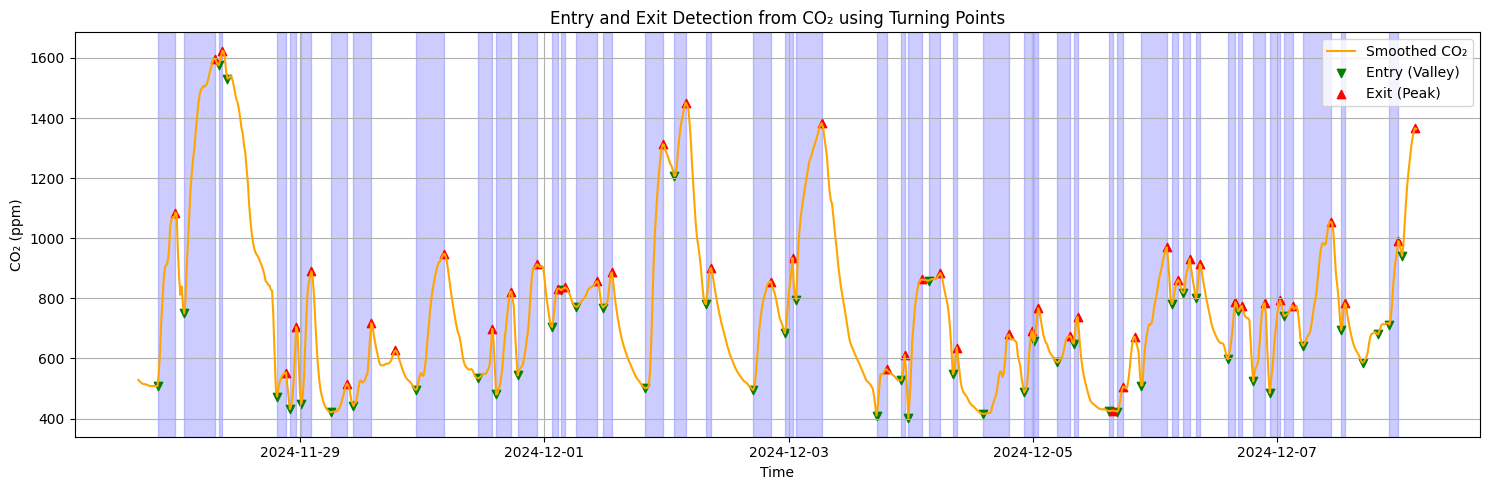

In [7]:
# Load CO₂ data
co2_series = dfs['L4']['co2_37_12'].dropna()[1000:2000]

# Smooth the signal with a centered moving average
co2_smooth = co2_series.rolling(window=3, center=True).mean().dropna()
co2_values = co2_smooth.values
co2_index = co2_smooth.index

# Detect local minima (valleys = entry) and maxima (peaks = exit)
window = 3  # controls sensitivity
valley_idx = argrelextrema(co2_values, np.less, order=window)[0]
peak_idx = argrelextrema(co2_values, np.greater, order=window)[0]
valley_times = co2_index[valley_idx]
peak_times = co2_index[peak_idx]

# Match valleys to the next peak BEFORE the next valley
entry_exit_pairs_strict = []
p_idx = 0

for i in range(len(valley_times) - 1):
    entry = valley_times[i]
    next_valley = valley_times[i + 1]

    # Find the first peak after entry but before next valley
    while p_idx < len(peak_times) and peak_times[p_idx] <= entry:
        p_idx += 1
    if p_idx < len(peak_times) and peak_times[p_idx] < next_valley:
        exit = peak_times[p_idx]
        entry_exit_pairs_strict.append((entry, exit))
        p_idx += 1



# Plot results
plt.figure(figsize=(15, 5))
plt.plot(co2_index, co2_values, label='Smoothed CO₂', color='orange')


# Shade inferred occupancy intervals
for entry, exit in entry_exit_pairs_strict:
    plt.axvspan(entry, exit, color='blue', alpha=0.2)

# Mark entry and exit points
plt.scatter(co2_index[valley_idx], co2_values[valley_idx], color='green', marker='v', label='Entry (Valley)')
plt.scatter(co2_index[peak_idx], co2_values[peak_idx], color='red', marker='^', label='Exit (Peak)')
plt.title('Entry and Exit Detection from CO₂ using Turning Points')
plt.xlabel('Time')
plt.ylabel('CO₂ (ppm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In order to validate the accuracy of the proposed method for detecting occupancy in the residential apartment, the analysis of the occupancy distribution over time of a day is carried out as reasonable alternative for comparing with non-existing ground truth data.

The bar plot on Figure below illustrates the average hourly occupancy in the monitored apartment, separated by weekdays and weekends, based on entry-exit detection inferred from CO₂ concentration dynamics. The most prominent pattern observed is the concentration of occupancy during nighttime hours, particularly from 22:00 to 07:00, on both weekdays and weekends. This sustained overnight presence suggests that the apartment is primarily used for residential purposes, where occupants spend the night indoors. The detection method which identifies entry events as CO₂ levels begin to rise and exit events as CO₂ begins to decline, consistently captures long, uninterrupted periods of occupancy across these nighttime hours. This is indicative of sleeping or resting periods, where limited ventilation and continuous human presence lead to stable CO₂ accumulation and slow decay patterns.

On weekdays, occupancy drops significantly after 06:00 and remains low through the midday and early afternoon hours, with a moderate rise in the late afternoon and early evening, suggesting re-entry into the apartment after daytime absence. This reflects typical out-of-home routines such as work or school, consistent with daily commuting patterns.

In contrast, weekends exhibit a higher and more sustained level of occupancy throughout the morning (increased occupancy by 10:00 when compared with a workday distribution and from 13:00 on, corresponding to lunchtime), indicating prolonged daytime presence. This is typical for non-working days when occupants spend more time at home and align with residential lifestyle patterns during weekends.

These findings demonstrate clear occupancy rhythms, with nighttime presence dominating all days, and distinct separation between weekday and weekend daytime use. For energy-efficient district heating control, this pattern suggests that daytime setback strategies could be applied dynamically on weekdays but should be minimized on weekends. Integrating occupancy-aware heating logic based on this type of behavioral inference can lead to significant energy savings while preserving occupant comfort.

C:\Users\Milan\AppData\Local\Temp\ipykernel_50580\4157350570.py:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_range = pd.date_range(start=entry, end=exit, freq='15T')


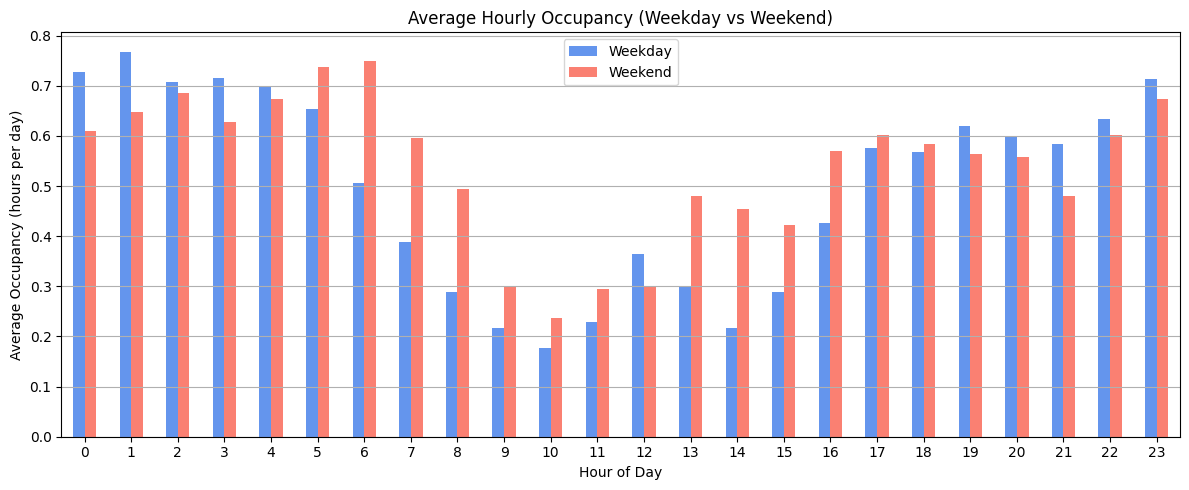

In [6]:
# Determine number of unique days in the dataset
dates = co2_smooth.index.normalize().unique()
weekday_days = sum(d.weekday() < 5 for d in dates)  # Monday–Friday
weekend_days = sum(d.weekday() >= 5 for d in dates)  # Saturday–Sunday

# Count occupancy minutes per hour for weekdays and weekends separately
weekday_counter = Counter()
weekend_counter = Counter()

for entry, exit in entry_exit_pairs_strict:
    time_range = pd.date_range(start=entry, end=exit, freq='15T')
    for t in time_range:
        if t.weekday() < 5:
            weekday_counter[t.hour] += 15  # 15 minutes
        else:
            weekend_counter[t.hour] += 15

# Convert minutes to average hours per day
weekday_avg = {hour: weekday_counter[hour] / 60.0 / weekday_days for hour in range(24)}
weekend_avg = {hour: weekend_counter[hour] / 60.0 / weekend_days for hour in range(24)}

# Create DataFrame for plotting
avg_df = pd.DataFrame({
    'Weekday': pd.Series(weekday_avg),
    'Weekend': pd.Series(weekend_avg)
}).fillna(0)

# Plot
avg_df.plot(kind='bar', figsize=(12, 5), color=['cornflowerblue', 'salmon'])
plt.title('Average Hourly Occupancy (Weekday vs Weekend)')
plt.xlabel('Hour of Day')
plt.ylabel('Average Occupancy (hours per day)')
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


## Window opening event detection

To detect potential window opening events in district-heated apartments, a multivariate outlier detection method based on the robust Mahalanobis distance was applied. The analysis utilized time series data, including indoor temperature, indoor relative humidity, indoor CO₂ concentration, and ambient (outdoor) temperature.

In the first step, feature engineering was carried out by computing first-order differences for the indoor temperature (diff_temp), relative humidity (diff_humidity), and CO₂ levels (diff_co2). These features capture the short-term dynamic changes in indoor conditions that are potentially indicative of ventilation events. Additionally, the difference between indoor and outdoor temperature (delta_temp) was included to account for the thermal gradient, which plays a key role in the intensity of temperature drops following window openings. To focus the analysis on realistic candidate events, the dataset was filtered to include only those time steps where the indoor temperature exhibited a negative difference (diff_temp < 0), thus eliminating cases of temperature increase that are inconsistent with expected ventilation-induced cooling. The resulting feature set was standardized using z-score normalization to ensure scale invariance across variables.

Outlier detection was then performed using the Minimum Covariance Determinant (MCD) estimator, a robust statistical method that minimizes the influence of extreme values when estimating the data distribution. The Mahalanobis distance was computed for each observation using the robust covariance matrix and mean estimated by MCD. Observations exceeding the 99th percentile of the Mahalanobis distance distribution were flagged as potential window opening events.

To facilitate interpretability, Figure below was shown with visualized selected segments of the data that correspond to candidate events. Six index ranges were manually defined to zoom into representative windows. For each segment, the temporal evolution of diff_temp, diff_humidity, and diff_co2 was plotted, along with the outdoor temperature (t_amb) on a secondary axis. Vertical red lines were overlaid to indicate the timestamps of detected events. This visualization allows for intuitive inspection of the dynamics around each anomaly and supports the interpretation that sudden drops in indoor temperature coinciding with changes in humidity and CO₂ concentration. The subplots indicate also notable differences in temperature drops depending on the outdoor temperature.

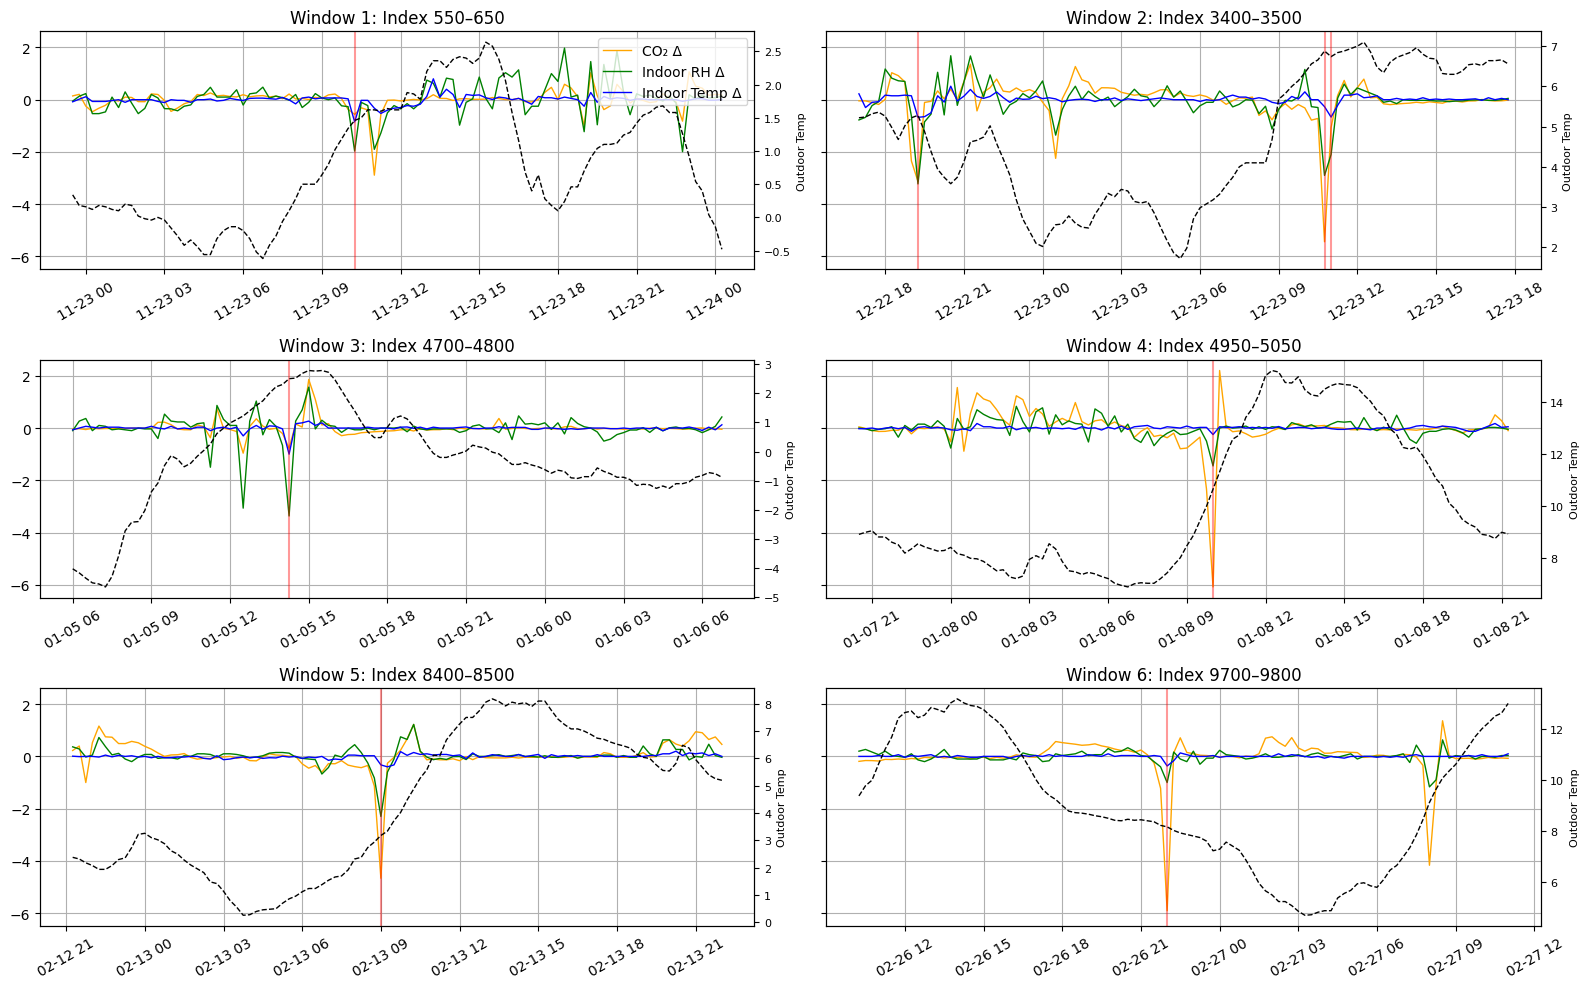

In [ ]:
# Prepare full dataset
df_env = dfs['L4'][['t_amb', 'temperature_37_12', 'relative_humidity_37_12', 'co2_37_12']].copy()

# Feature engineering
df_env['delta_temp'] = df_env['temperature_37_12'] - df_env['t_amb']
df_env['diff_temp'] = df_env['temperature_37_12'].diff()
df_env['diff_humidity'] = df_env['relative_humidity_37_12'].diff()
df_env['diff_co2'] = df_env['co2_37_12'].diff()

# Filter for modeling
features = df_env[['diff_temp', 'diff_humidity', 'diff_co2', 'delta_temp']].dropna()
features = features[features['diff_temp'] < 0]  # Only temp drops

# Mahalanobis
features_z = features.apply(zscore)
mcd = MinCovDet().fit(features_z)
mahal_dist = mcd.mahalanobis(features_z)

threshold = np.percentile(mahal_dist, 99)
window_opening_events = mahal_dist > threshold
event_times = features.index[window_opening_events]

# Define zoom windows
zoom_ranges = [
    (550, 650),
    (3400, 3500),
    (4700, 4800),
    (4950, 5050),
    (8400, 8500),
    (9700, 9800),
]

# Plot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 10), sharey=True)
axes = axes.flatten()

for i, (start_idx, end_idx) in enumerate(zoom_ranges):
    ax = axes[i]
    window = df_env.iloc[start_idx:end_idx]

    # Primary axis
    ax.plot(window.index, window['diff_co2'] / 100, label='CO₂ Δ', color='orange', linewidth=1)
    ax.plot(window.index, window['diff_humidity'], label='Indoor RH Δ', color='green', linewidth=1)
    ax.plot(window.index, window['diff_temp'], label='Indoor Temp Δ', color='blue', linewidth=1)

    # Secondary axis for t_amb
    ax2 = ax.twinx()
    ax2.plot(window.index, window['t_amb'], color='black', linestyle='--', linewidth=1, label='Outdoor Temp (°C)')
    ax2.set_ylabel('Outdoor Temp', color='black', fontsize=8)
    ax2.tick_params(axis='y', labelsize=8, labelcolor='black')

    # Mark events
    for t in event_times:
        if window.index[0] <= t <= window.index[-1]:
            ax.axvline(t, color='red', alpha=0.4)

    ax.set_title(f'Window {i+1}: Index {start_idx}–{end_idx}')
    ax.tick_params(axis='x', rotation=30)
    ax.grid(True)

# Only add legend once
axes[0].legend(loc='upper right')

plt.tight_layout()
plt.show()

The histogram at Figure below shows the distribution of detected window opening events across the hours of the day, restricted to workdays only. The x-axis represents the hour of the day (0 to 24), and the y-axis shows the number of events detected within each hour. The majority of window openings occur between 10:00 and 12:00, with a maximum at 11:00. This likely reflects mid-morning ventilation behavior in residential or semi-residential settings. A smaller number of openings occur early in the morning (5-6 AM) and again in the evening (20-24 PM). These may correspond to morning routines (e.g., preparing for work, waking up) and evening relaxation or cooling after returning home or before bedtime. There is little to no activity in the early and late afternoon. This could suggest lower occupancy of the apartment (which is confirmed in a previous analysis) or that the indoor conditions remain stable enough to not prompt ventilation during this time.

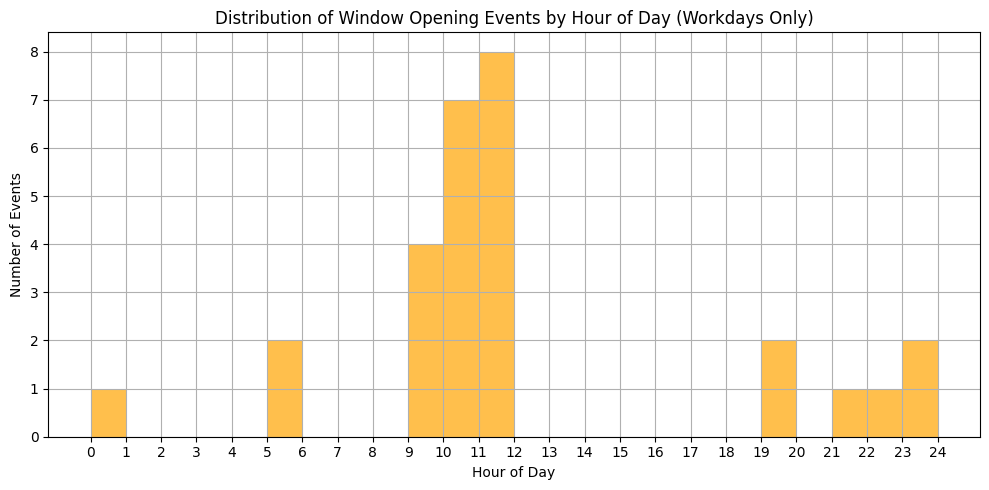

In [ ]:
# Create DataFrame of detected events
event_times = features.index[window_opening_events]
events_df = pd.DataFrame({'timestamp': event_times})

# Extract hour and day type
events_df['hour'] = events_df['timestamp'].dt.hour
events_df['weekday'] = events_df['timestamp'].dt.weekday  # Monday = 0, Sunday = 6
events_df['weekpart'] = events_df['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Workday')

# Filter for workday events only
workday_events = events_df[events_df['weekpart'] == 'Workday']

# Plot histogram
plt.figure(figsize=(10, 5))
plt.hist(workday_events['hour'], bins=range(0, 25), alpha=0.7, color='orange')

plt.title("Distribution of Window Opening Events by Hour of Day (Workdays Only)")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Events")
plt.xticks(range(0, 25))
plt.grid(True)
plt.tight_layout()
plt.show()


# Conclusion

The research behind this paper demonstrates that behavioral signals such as occupant presence and window opening events in district-heated residential apartments can be reliably inferred from high-resolution environmental sensor data using unsupervised analytical methods. Presence detection based on CO₂ concentration trends successfully identified periods of apartment occupancy, while window opening events were detected by applying multivariate outlier detection on short-term changes in indoor climate parameters. The distribution of detected behaviors across time of day aligns with intuitive daily routines, confirming the interpretability and relevance of the identified events. This led to the conclusion that the initial hypothesis has been confirmed.

The integration of such consumer behavior detection into District Heating System (DHS) operations presents a valuable opportunity to transition from supply-centric to demand-aware control strategies. By embedding inferred behavioral states, such as ventilation and occupancy, into predictive and real-time control models, DHS operators can more accurately anticipate thermal needs, avoid unnecessary heat delivery during absences, and better accommodate user-driven ventilation actions. This can lead to improved energy efficiency, reduced peak loads, enhanced indoor comfort, and ultimately, lower greenhouse gas emissions.

It is important to highlight that the presented work only explores the feasibility of using the method to detect occupancy and window opening events on the full time series, not on a data stream, which is a more difficult problem, but leading to a more practical solution for improved, consumer-behavior-aware DHS control.
Future work should focus on scaling the proposed approach across diverse building types, occupant profiles, and climate conditions to assess generalizability. Additional research is also needed to validate detected behaviors against ground truth data where available and to quantify the potential energy and cost savings from integrating behavioral insights into control logic. Moreover, real-time implementation frameworks and privacy-preserving analytics should be developed to support practical deployment in live DHS operations.

# References

1. Zdravković, M., Ćirić, I., & Ignjatović, M. (2022). Explainable heat demand forecasting for the novel control strategies of district heating systems. Annual Reviews in Control, 53, 405–413. https://doi.org/10.1016/j.arcontrol.2022.03.009

2. Cvetković, S., Zdravković, M., & Ignjatović, M. (2025). Exploring district heating systems: A SCADA dataset for enhanced explainability. Data in Brief, 59, 111320. https://doi.org/10.1016/j.dib.2025.111320

3. Turudija, R., Stojiljković, D., Zdravković, M., & Ignjatović, M. (2024). Towards an Approach to Multivariate Outlier Detection for District Heating System Data. In M. Trajanović, N. Filipović, & M. Zdravković (Eds.), Disruptive Information Technologies for a Smart Society (Vol. 860, pp. 49–61). Springer Nature Switzerland. https://doi.org/10.1007/978-3-031-71419-1_5

4. Rusek, R., Melendez Frigola, J., & Colomer Llinas, J. (2022). Influence of occupant presence patterns on energy consumption and its relation to comfort: A case study based on sensor and crowd-sensed data. Energy, Sustainability and Society, 12(1), 13. https://doi.org/10.1186/s13705-022-00336-6

5. Guo, F., Chen, Z., & Wang, J. (2024). Effect of Dynamic Window Opening Behaviors on Indoor Thermal Environment and Energy Consumption in Residential Buildings of Different Chinese Thermal Climate Zones. Buildings, 15(1), 28. https://doi.org/10.3390/buildings15010028

6. Erickson, V. L., Carreira-Perpiñán, M. Á., & Cerpa, A. E. (2014). Occupancy Modeling and Prediction for Building Energy Management. ACM Transactions on Sensor Networks, 10(3), 1–28. https://doi.org/10.1145/2594771

7. Taylor, C. E. (2015). Occupancy Matching. Energy Engineering, 112(3), 11–21. https://doi.org/10.1080/01998595.2015.11414489

8. Wang, C., Pattawi, K., & Lee, H. (2020). Energy saving impact of occupancy-driven thermostat for residential buildings. Energy and Buildings, 211, 109791. https://doi.org/10.1016/j.enbuild.2020.109791

9. Dai, X., Liu, J., & Zhang, X. (2020). A review of studies applying machine learning models to predict occupancy and window-opening behaviours in smart buildings. Energy and Buildings, 223, 110159. https://doi.org/10.1016/j.enbuild.2020.110159

10. Sirati, M., O’Brien, W., & Cruickshank, C. A. (2025). Analyzing smart thermostat data to uncover trends in remote work behaviors. Energy and Buildings, 330, 115320. https://doi.org/10.1016/j.enbuild.2025.115320

11. Zhang, W., Wu, Y., & Calautit, J. K. (2022). A review on occupancy prediction through machine learning for enhancing energy efficiency, air quality and thermal comfort in the built environment. Renewable and Sustainable Energy Reviews, 167, 112704. https://doi.org/10.1016/j.rser.2022.112704

12. Abuhussain, M. A., Alotaibi, B. S., Dodo, Y. A., Maghrabi, A., & Aliero, M. S. (2024). Multimodal Framework for Smart Building Occupancy Detection. Sustainability, 16(10), 4171. https://doi.org/10.3390/su16104171


13. Tien, P. W., Wei, S., Calautit, J. K., Darkwa, J., & Wood, C. (2022). Real-time monitoring of occupancy activities and window opening within buildings using an integrated deep learning-based approach for reducing energy demand. Applied Energy, 308, 118336. https://doi.org/10.1016/j.apenergy.2021.118336

14. Shim, J., & Song, D. (2023). Analysis of heating behaviour based on occupancy patterns in residential building with radiant floor heating system. E3S Web of Conferences, 396, 03027. https://doi.org/10.1051/e3sconf/202339603027

15. Becker, V., & Kleiminger, W. (2018). Exploring zero-training algorithms for occupancy detection based on smart meter measurements. Computer Science - Research and Development, 33(1–2), 25–36. https://doi.org/10.1007/s00450-017-0344-9

16. Rijal, H. B., Tuohy, P., Humphreys, M. A., Nicol, J. F., Samuel, A., & Clarke, J. (2007). Using results from field surveys to predict the effect of open windows on thermal comfort and energy use in buildings. Energy and Buildings, 39(7), 823–836. https://doi.org/10.1016/j.enbuild.2007.02.003

17. Hoyet, V., Bouville, M., Robillart, M., Pannier, M.L. (2023) Detecting night opening of windows in summer: a case study. INTERNATIONAL CONGRESS ON MEASUREMENT, QUALITY AND DATA SCIENCE, MQDS 2023, June 5-7, Bordeaux-France

18. De Rautlin De La Roy, E., Recht, T., Zemmari, A., Bourreau, P., & Mora, L. (2023). Deep learning models for building window-openings detection in heating season. Building and Environment, 231, 110019. https://doi.org/10.1016/j.buildenv.2023.110019

19. Markovic, R., Frisch, J., & Van Treeck, C. (2019). Learning short-term past as predictor of window opening-related human behavior in commercial buildings. Energy and Buildings, 185, 1–11. https://doi.org/10.1016/j.enbuild.2018.12.012

20. Nguyen, T. H., Ionescu, A., Géhin, E., & Ramalho, O. (2022). Predicting the opening state of a group of windows in an open-plan office by using machine learning models. Building and Environment, 225, 109636. https://doi.org/10.1016/j.buildenv.2022.109636

21. Pandya, S., & Ghayvat, H. (2021). Ambient acoustic event assistive framework for identification, detection, and recognition of unknown acoustic events of a residence. Advanced Engineering Informatics, 47, 101238. https://doi.org/10.1016/j.aei.2020.101238

22. Reprint of: Mahalanobis, P.C. (1936) “On the Generalised Distance in Statistics.” (2018). Sankhya A, 80(S1), 1–7. https://doi.org/10.1007/s13171-019-00164-5
